In [1]:
import cv2
import time
import numpy as np
import os
import psutil  # Import psutil for memory usage
from keras.models import load_model
from IPython.display import display, Image, clear_output

def preprocess_image(img, target_shape=(224, 224)):
    resized_img = cv2.resize(img, target_shape)
    return resized_img

def display_eye_and_predictions(eye_region, predictions):
    #cv2.putText(eye_region, f"Predictions: {predictions}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    rgb_eye_region = cv2.cvtColor(eye_region, cv2.COLOR_BGR2RGB)

    display(Image(data=cv2.imencode('.png', rgb_eye_region)[1].tobytes(), format='png'))

start_total_time = time.time()

model_path = "VGG_RNR_model.h5"
model = load_model(model_path)

cap = cv2.VideoCapture(0) 
evaluation_duration = 30
start_time = time.time()

output_folder = 'output_images_RNR(VGG)'
os.makedirs(output_folder, exist_ok=True)

eye_images = []
predictions = []

while time.time() - start_time < evaluation_duration:
    ret, frame = cap.read()

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray_frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            
            eye_region = frame[y+ey:y+ey+eh, x+ex:x+ex+ew]

            preprocessed_eye = preprocess_image(eye_region)

            input_data = np.expand_dims(preprocessed_eye, axis=0)

            prediction = model.predict(input_data)

            final_prediction = 1 if prediction[0, 1] > 0.50 else 0

            display_eye_and_predictions(eye_region, final_prediction)

            eye_images.append((preprocessed_eye, final_prediction))

            clear_output(wait=True)

            time.sleep(0.5)

end_total_time = time.time()

total_time = end_total_time - start_total_time
print(f"Total time: {total_time:.2f} seconds")

process = psutil.Process(os.getpid())
memory_used = process.memory_info().rss
print(f"Memory used: {memory_used / (1024 ** 2):.2f} MB")

for i, (eye_img, pred) in enumerate(eye_images):
    file_name = os.path.join(output_folder, f"eye_{i}_class_{pred}.png")
    cv2.imwrite(file_name, cv2.cvtColor(eye_img, cv2.COLOR_BGR2RGB))

cap.release()
cv2.destroyAllWindows()


Total time: 38.27 seconds
Memory used: 961.21 MB


In [2]:
import cv2
import time
import numpy as np
import os
import psutil  # Import psutil for memory usage
from keras.models import load_model
from IPython.display import display, Image, clear_output

def preprocess_image(img, target_shape=(224, 224)):
    resized_img = cv2.resize(img, target_shape)
    return resized_img

def display_eye_and_predictions(eye_region, predictions):
    #cv2.putText(eye_region, f"Predictions: {predictions}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    rgb_eye_region = cv2.cvtColor(eye_region, cv2.COLOR_BGR2RGB)

    display(Image(data=cv2.imencode('.png', rgb_eye_region)[1].tobytes(), format='png'))

start_total_time = time.time()

model_path = 'efficientnet_custom_R&NR_model.h5'
model = load_model(model_path)

cap = cv2.VideoCapture(0) 
evaluation_duration = 30
start_time = time.time()

output_folder = 'output_images_RNR(CUSTOM)'
os.makedirs(output_folder, exist_ok=True)

eye_images = []
predictions = []

while time.time() - start_time < evaluation_duration:
    ret, frame = cap.read()

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray_frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            
            eye_region = frame[y+ey:y+ey+eh, x+ex:x+ex+ew]

            preprocessed_eye = preprocess_image(eye_region)

            input_data = np.expand_dims(preprocessed_eye, axis=0)

            prediction = model.predict(input_data)

            final_prediction = 1 if prediction[0, 1] > 0.50 else 0

            display_eye_and_predictions(eye_region, final_prediction)

            eye_images.append((preprocessed_eye, final_prediction))

            clear_output(wait=True)

            time.sleep(0.5)

end_total_time = time.time()

total_time = end_total_time - start_total_time
print(f"Total time: {total_time:.2f} seconds")

process = psutil.Process(os.getpid())
memory_used = process.memory_info().rss
print(f"Memory used: {memory_used / (1024 ** 2):.2f} MB")

for i, (eye_img, pred) in enumerate(eye_images):
    file_name = os.path.join(output_folder, f"eye_{i}_class_{pred}.png")
    cv2.imwrite(file_name, cv2.cvtColor(eye_img, cv2.COLOR_BGR2RGB))

cap.release()
cv2.destroyAllWindows()


Total time: 35.90 seconds
Memory used: 789.99 MB


In [1]:
import cv2
import time
import numpy as np
import os
import psutil  # Import psutil for memory usage
from keras.models import load_model
from IPython.display import display, Image, clear_output

def preprocess_image(img, target_shape=(224, 224)):
    resized_img = cv2.resize(img, target_shape)
    return resized_img

def display_eye_and_predictions(eye_region, predictions):
    #cv2.putText(eye_region, f"Predictions: {predictions}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    rgb_eye_region = cv2.cvtColor(eye_region, cv2.COLOR_BGR2RGB)

    display(Image(data=cv2.imencode('.png', rgb_eye_region)[1].tobytes(), format='png'))

start_total_time = time.time()

model_path = 'Efficient_B2_R&NR_model.h5'
model = load_model(model_path)

cap = cv2.VideoCapture(0) 
evaluation_duration = 30
start_time = time.time()

output_folder = 'output_images_RNR(B2)'
os.makedirs(output_folder, exist_ok=True)

eye_images = []
predictions = []

while time.time() - start_time < evaluation_duration:
    ret, frame = cap.read()

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray_frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            
            eye_region = frame[y+ey:y+ey+eh, x+ex:x+ex+ew]

            preprocessed_eye = preprocess_image(eye_region)

            input_data = np.expand_dims(preprocessed_eye, axis=0)

            prediction = model.predict(input_data)

            final_prediction = 1 if prediction[0, 1] > 0.50 else 0

            display_eye_and_predictions(eye_region, final_prediction)

            eye_images.append((preprocessed_eye, final_prediction))

            clear_output(wait=True)

            time.sleep(0.5)

end_total_time = time.time()

total_time = end_total_time - start_total_time
print(f"Total time: {total_time:.2f} seconds")

process = psutil.Process(os.getpid())
memory_used = process.memory_info().rss
print(f"Memory used: {memory_used / (1024 ** 2):.2f} MB")

for i, (eye_img, pred) in enumerate(eye_images):
    file_name = os.path.join(output_folder, f"eye_{i}_class_{pred}.png")
    cv2.imwrite(file_name, cv2.cvtColor(eye_img, cv2.COLOR_BGR2RGB))

cap.release()
cv2.destroyAllWindows()


Total time: 49.36 seconds
Memory used: 763.28 MB


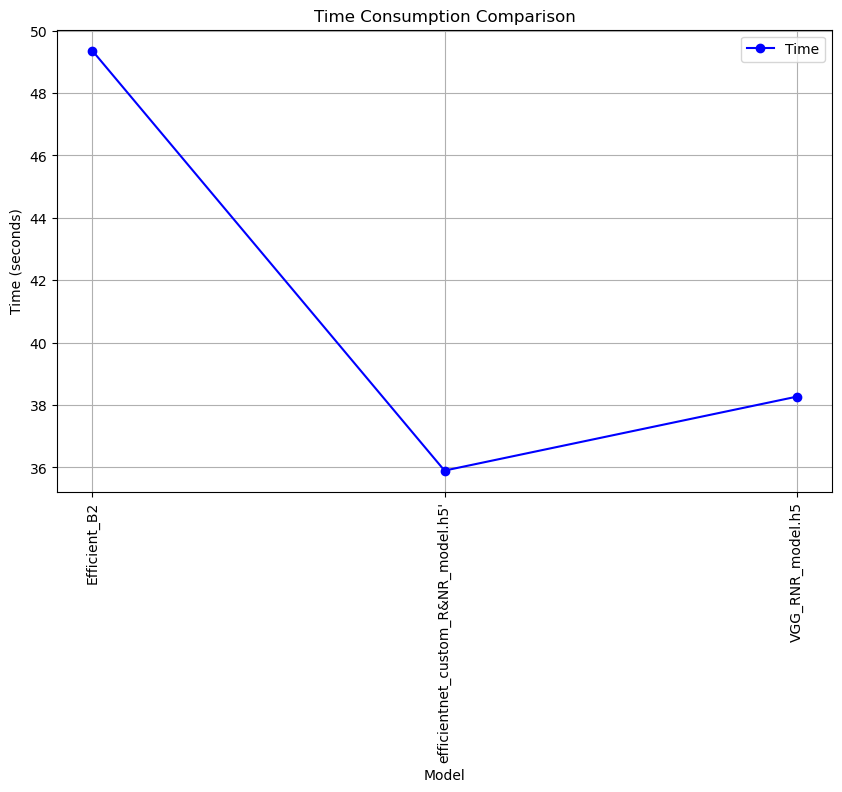

In [2]:
import matplotlib.pyplot as plt

model_names = ["Efficient_B2", "efficientnet_custom_R&NR_model.h5'",  "VGG_RNR_model.h5"]
time_values = [ 49.36,35.90 , 38.27]

plt.figure(figsize=(10, 6))
plt.plot(model_names, time_values, marker='o', linestyle='-', color='blue', label='Time')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.title('Time Consumption Comparison')
plt.legend()
plt.xticks(rotation='vertical')  
plt.grid(True)
plt.show()


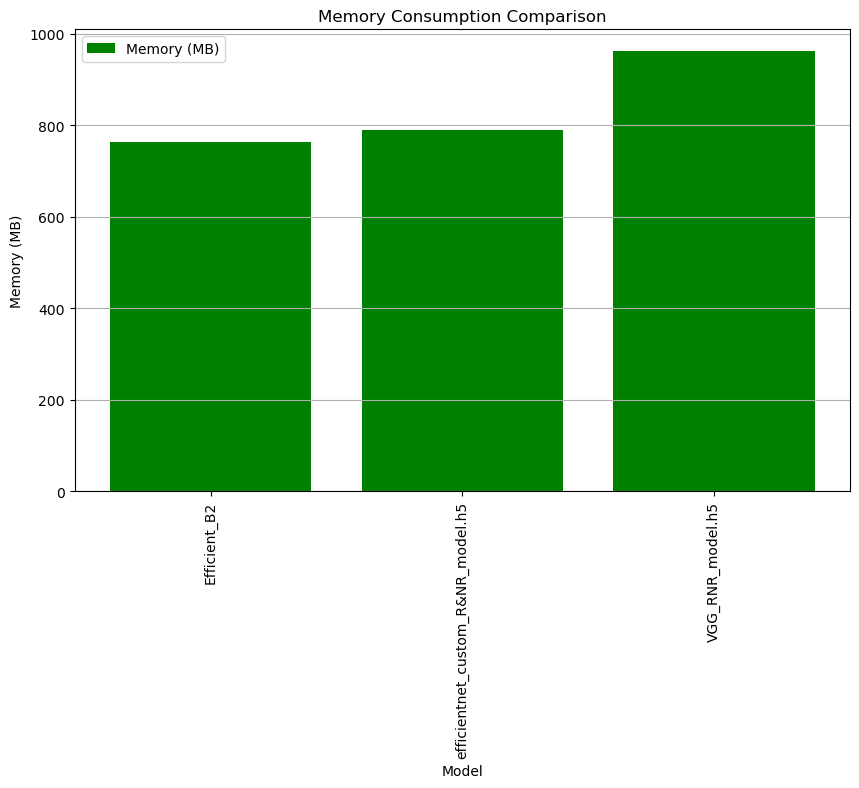

In [3]:
import matplotlib.pyplot as plt

model_names = [ "Efficient_B2", "efficientnet_custom_R&NR_model.h5", "VGG_RNR_model.h5"]
memory_values = [763.28, 789.99, 961.21]

plt.figure(figsize=(10, 6))
plt.bar(model_names, memory_values, color='green', label='Memory (MB)')
plt.xlabel('Model')
plt.ylabel('Memory (MB)')
plt.title('Memory Consumption Comparison')
plt.legend()
plt.xticks(rotation='vertical')  
plt.grid(axis='y')
plt.show()


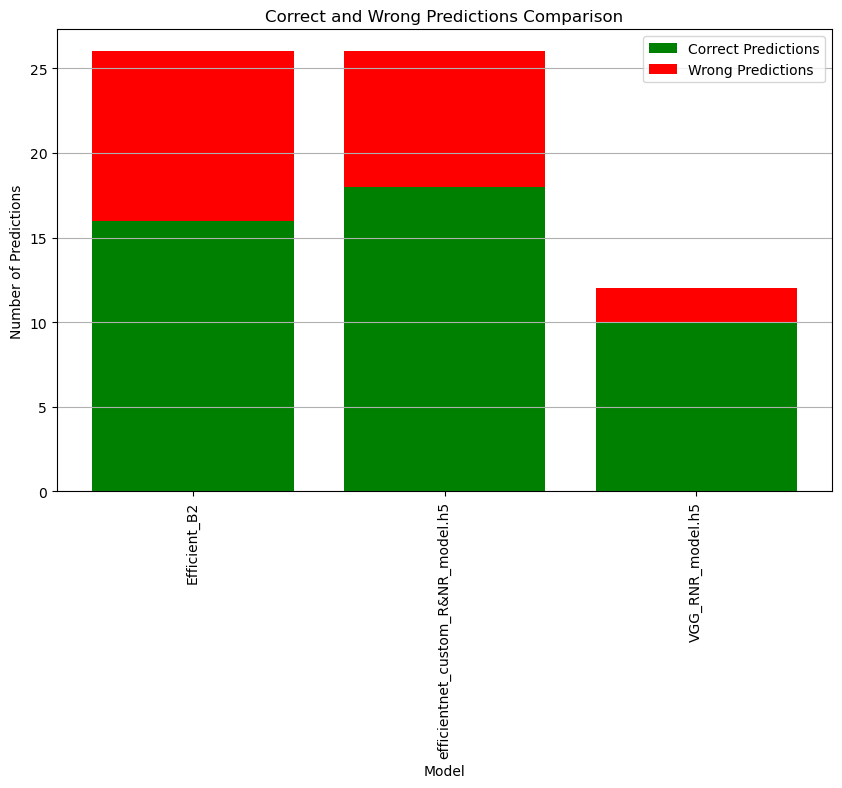

In [4]:
import matplotlib.pyplot as plt

model_names = [ "Efficient_B2", "efficientnet_custom_R&NR_model.h5", "VGG_RNR_model.h5"]
correct_predictions = [16, 18, 10]
wrong_predictions = [10, 8, 2]

plt.figure(figsize=(10, 6))
plt.bar(model_names, correct_predictions, color='green', label='Correct Predictions')
plt.bar(model_names, wrong_predictions, bottom=correct_predictions, color='red', label='Wrong Predictions')
plt.xlabel('Model')
plt.ylabel('Number of Predictions')
plt.title('Correct and Wrong Predictions Comparison')
plt.legend()
plt.xticks(rotation='vertical') 
plt.grid(axis='y')
plt.show()


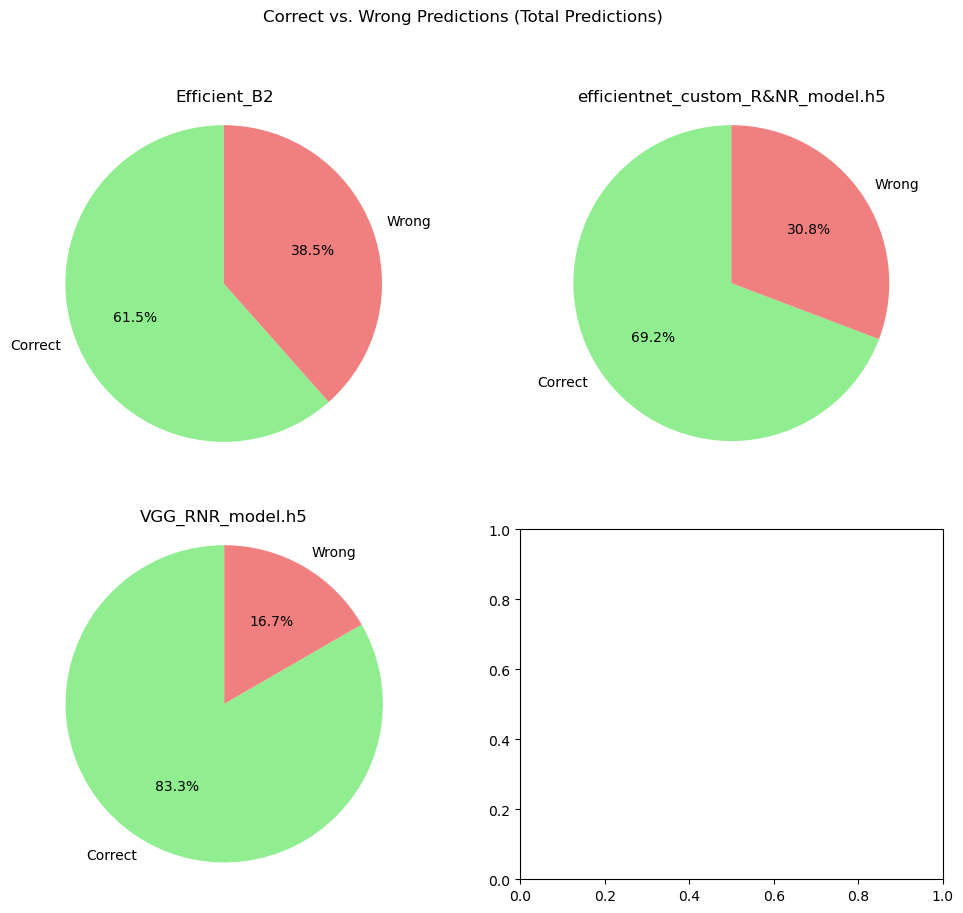

In [6]:
import matplotlib.pyplot as plt

correct_predictions = [16, 18, 10]
wrong_predictions = [10, 8, 2]
total_predictions = [26, 26, 12]
model_names = ["Efficient_B2", "efficientnet_custom_R&NR_model.h5","VGG_RNR_model.h5"]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Correct vs. Wrong Predictions (Total Predictions)")
for i in range(len(model_names)):
    ax = axs[i // 2, i % 2]
    labels = ['Correct', 'Wrong']
    sizes = [correct_predictions[i], wrong_predictions[i]]
    colors = ['lightgreen', 'lightcoral']
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.axis('equal')  
    ax.set_title(model_names[i])

plt.show()


In [ ]:
q